## Fraud detection using credit cards transaction dataset
The Institute of International Finance and Deloitte LLP highlights that: There is growing consensus that the current global framework for fighting financial crime is not as effective as it could be and that more needs to be done at the international, regional and national levels to help identify and stem the flow of illicit finance – an activity which supports some of the worst problems confronting society today, including terrorism, sexual exploitation, modern slavery, wildlife poaching and drug smuggling.

Whilst these problems in themselves are pressing and need a multifacted approach for resolution, financial institutions are facing even greater pressure to modernize and make more robust their AML functions for various risk management objectives.

ML has transformed the KYC processess and transaction monitoring functions. To further improve the customer onboarding there is need to contsantly improve the customer due dilligence processs (CDD) through recalllibration of these models and effective model governance.



In this project you will use dataset found in Kaggle containing transcation made in Sept 2013 by European card holders which occured in the course of 2 days. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues more background cannot be provided about the features.

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In this project you will use and learn about the various oversampling and undersampling techniques are why these are useful in varous classfication problems.

You will also get to lean why different classification metrics are used in the case of unbalanced data.

You will find the following information useful in understanding the nature of the presented features.

Every customer has a unique profile. That is their geoographical location, spending frequency and amounts.
The transactions happen in different terminals, merchants, or ATMs which are based in certain geographical locations.
There is an association of customers to terminals in the sense that customers are likely to make transactions in terminals geographically close to their locations.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [7]:
import pandas as pd
df = pd.read_csv('/content/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126842 entries, 0 to 126841
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    126842 non-null  int64  
 1   V1      126842 non-null  float64
 2   V2      126842 non-null  float64
 3   V3      126842 non-null  float64
 4   V4      126842 non-null  float64
 5   V5      126842 non-null  float64
 6   V6      126842 non-null  float64
 7   V7      126842 non-null  float64
 8   V8      126842 non-null  float64
 9   V9      126841 non-null  float64
 10  V10     126841 non-null  float64
 11  V11     126841 non-null  float64
 12  V12     126841 non-null  float64
 13  V13     126841 non-null  float64
 14  V14     126841 non-null  float64
 15  V15     126841 non-null  float64
 16  V16     126841 non-null  float64
 17  V17     126841 non-null  float64
 18  V18     126841 non-null  float64
 19  V19     126841 non-null  float64
 20  V20     126841 non-null  float64
 21  V21     12

In [8]:
df.shape

(126842, 31)

In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,1


In [11]:
df.isnull().sum().max()

1

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.drop(columns=['Time'],inplace=True)

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,126842.000000,126842.000000,126842.000000,126842.000000,126842.000000,126842.000000,126842.000000,126842.000000,126842.000000,126841.000000,...,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000,126841.000000
mean,48881.555471,-0.250296,-0.001127,0.676304,0.148385,-0.283756,0.084388,-0.115995,0.062204,-0.085131,...,-0.036336,-0.115196,-0.034406,0.011828,0.130663,0.026336,0.000705,0.001992,93.188432,0.002050
std,19649.937416,1.829039,1.626218,1.282556,1.330422,1.321164,1.288594,1.179549,1.214806,1.094140,...,0.725258,0.636708,0.607599,0.594706,0.438661,0.491506,0.391879,0.314250,252.555507,0.045229
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,36482.250000,-1.020532,-0.579207,0.172332,-0.707829,-0.904614,-0.657324,-0.602986,-0.133209,-0.712703,...,-0.225578,-0.543722,-0.173189,-0.324377,-0.135269,-0.324291,-0.060666,-0.004312,6.510000,0.000000
50%,50705.500000,-0.262156,0.093233,0.751957,0.175554,-0.315813,-0.169537,-0.066014,0.078508,-0.146805,...,-0.058833,-0.092464,-0.046422,0.068423,0.167306,-0.064471,0.011194,0.023518,24.950000,0.000000
75%,65183.000000,1.156809,0.761032,1.369928,1.005351,0.239889,0.471743,0.410132,0.371195,0.496674,...,0.116208,0.304561,0.082875,0.408717,0.418917,0.291984,0.085445,0.077301,83.570000,0.000000
max,78123.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


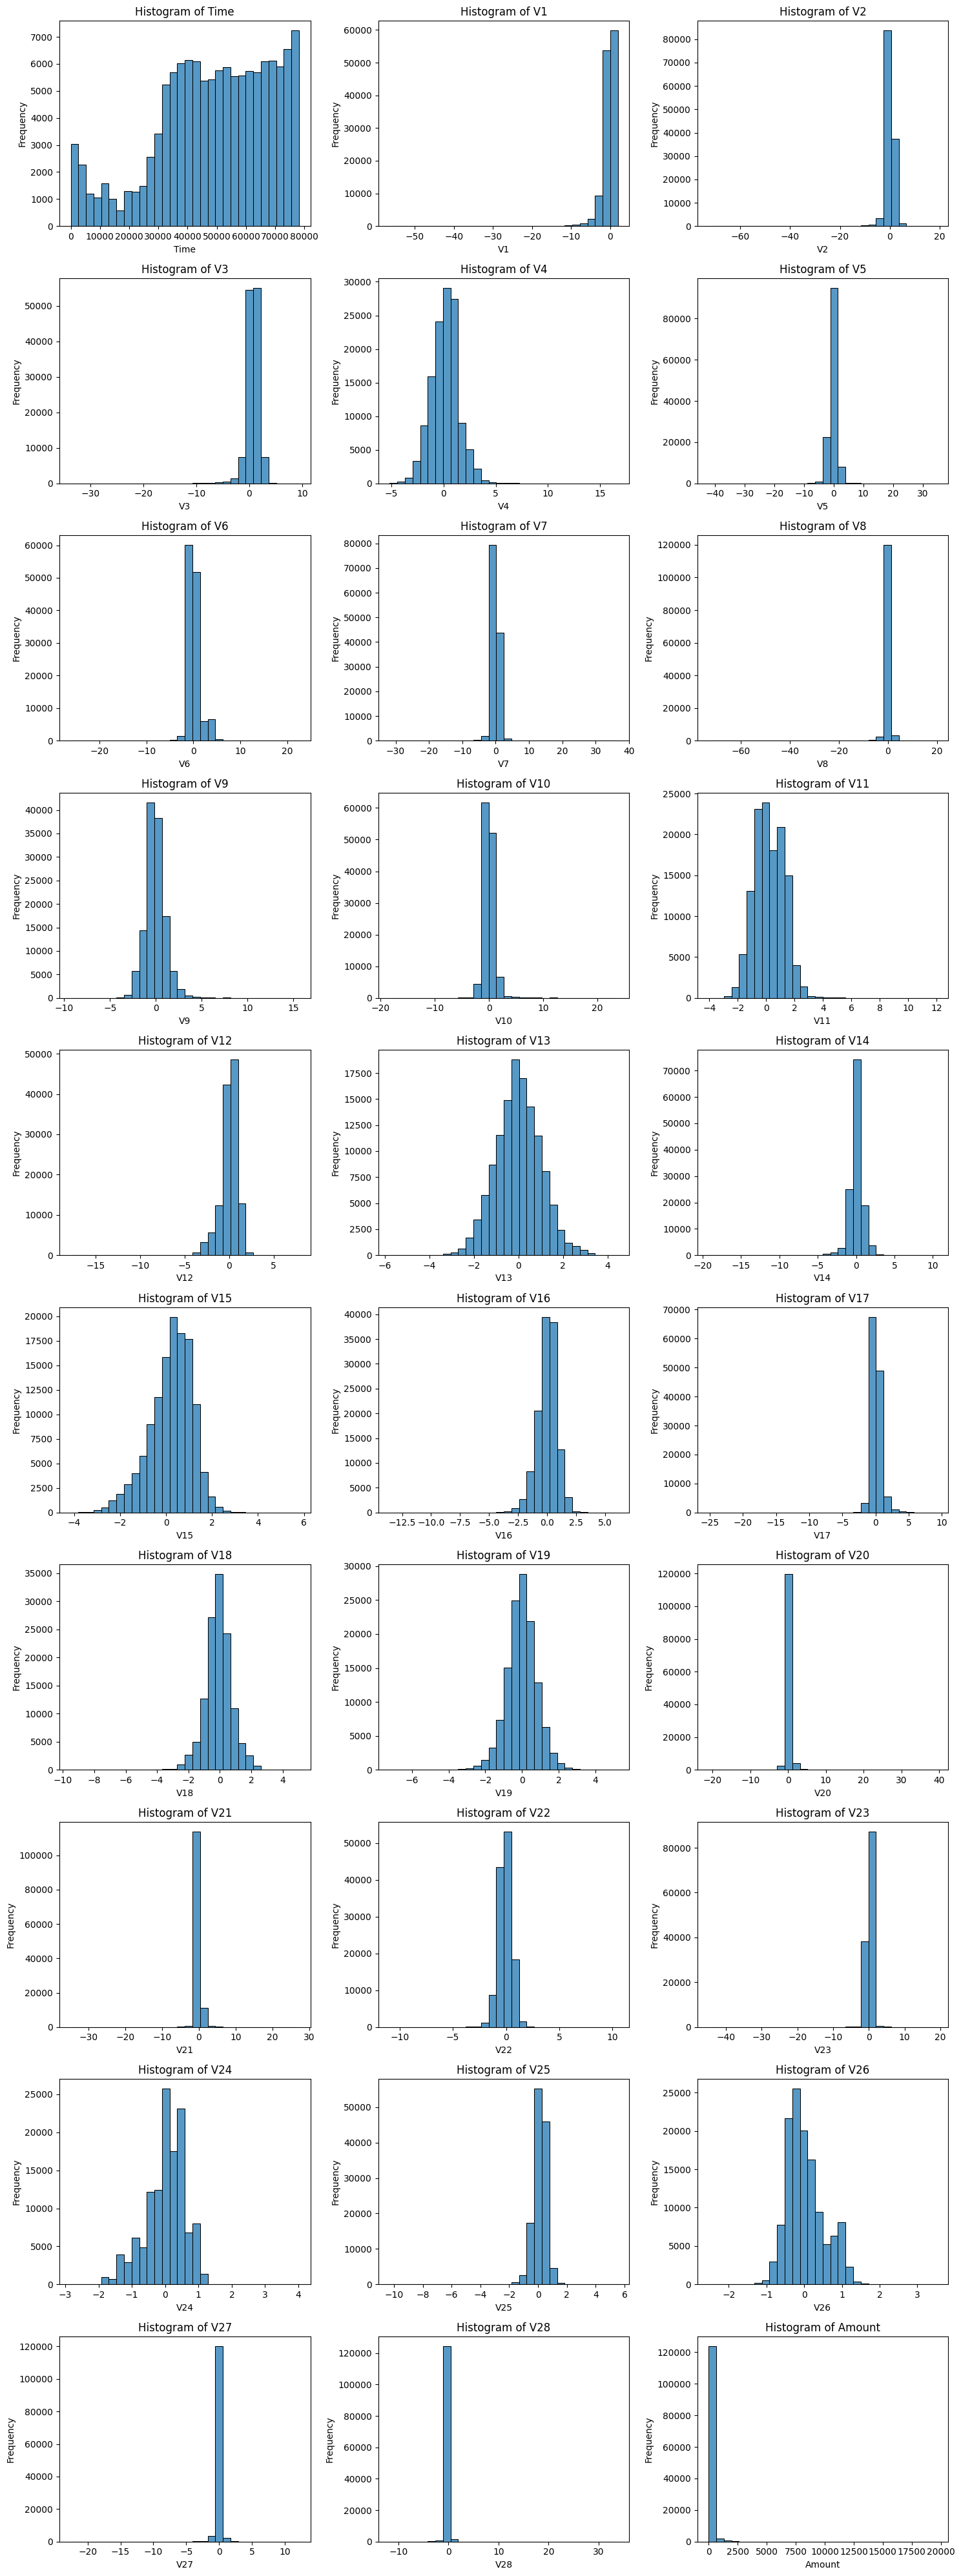

In [17]:
import matplotlib.pyplot as plt
features = df.columns[:-1]
fig, axes = plt.subplots(10, 3, figsize=(15, 40))
# Flatten axes array to loop through easily
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(df[feature], ax=axes[i], kde=False, bins=30)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()

In [23]:
df['Amount']=scaler.fit_transform(df[['Amount']])

In [24]:
x=df.drop(columns=['Class'])
y=df['Class']

In [26]:
from imblearn.under_sampling import RandomUnderSampler
df.dropna(subset=['Class'], inplace=True)
x = df.drop(columns=['Class'])
y = df['Class']
rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)

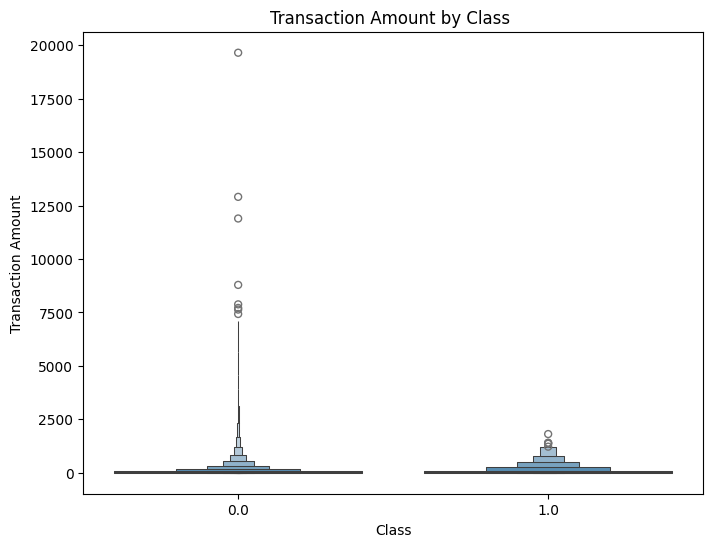

In [16]:
plt.figure(figsize=(8, 6))
sns.boxenplot(data=df, x='Class', y='Amount')
plt.title('Transaction Amount by Class ')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')
plt.show()

In [27]:
def evaluate_model(model,pred):
    print(f'Accuracy Train Score : {model.score(x_train,y_train)}\n')
    print(f'Accuracy Test Score : {model.score(x_test,y_test)}\n')
    print(f'Classification Report: \n{classification_report(y_test,pred)}\n')
    cm=confusion_matrix(pred,y_test)
    sns.heatmap(cm,annot=True,fmt='d')
    plt.show()

In [28]:
lr=LogisticRegression()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
lr=LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fit the Logistic Regression model to the training data
lr.fit(x_train, y_train)  # This line is added to fit the model
y_pred_lr=lr.predict(x_test)

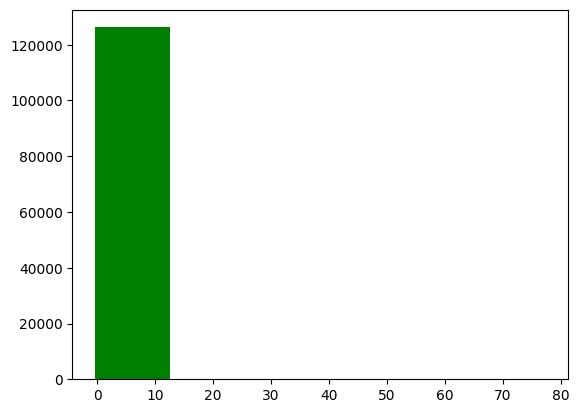

Minimum amount value is  -0.36898542756863123
Maximum amount value is  77.35724887441758
90% of the transactions have an amount less or equal than  0.4830025693671897


In [35]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

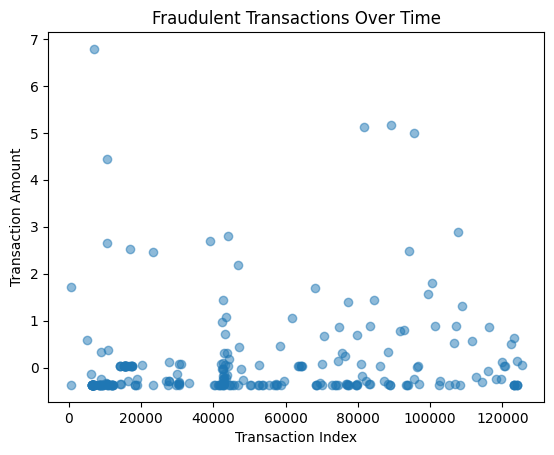

In [37]:
fraud = df[df['Class'] == 1]
# Replace 'Time' with a column that exists in the 'fraud' DataFrame,
# For example, if you want to plot against the index, you can use 'fraud.index'
plt.scatter(fraud.index, fraud['Amount'], alpha=0.5)
plt.title('Fraudulent Transactions Over Time')
plt.xlabel('Transaction Index')  # Update x-axis label
plt.ylabel('Transaction Amount')
plt.show()

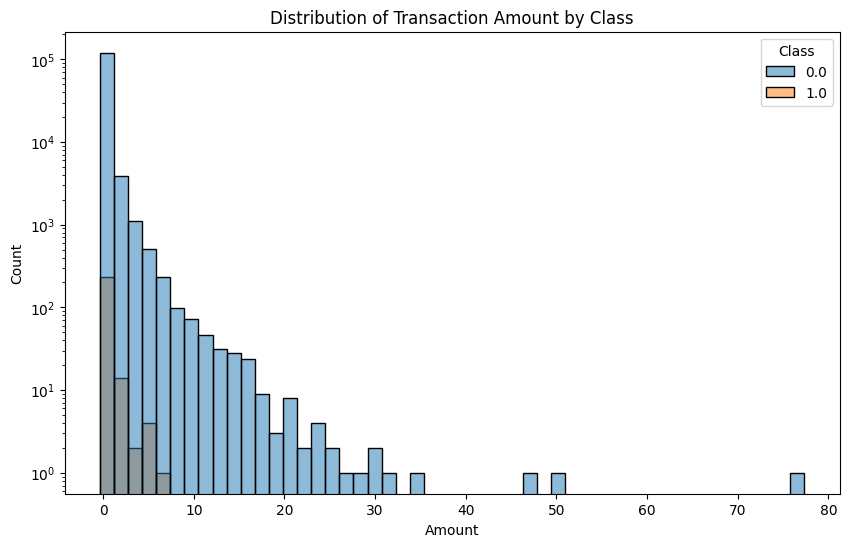

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50)
plt.title('Distribution of Transaction Amount by Class')
plt.yscale('log')
plt.show()

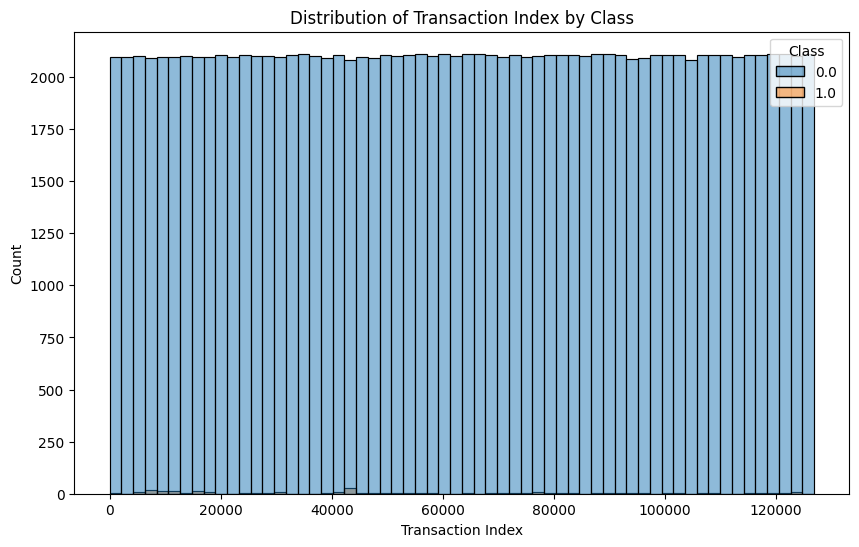

In [43]:
# Time distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=df.index, hue='Class', bins=60)
plt.title('Distribution of Transaction Index by Class')
plt.xlabel('Transaction Index')
plt.show()

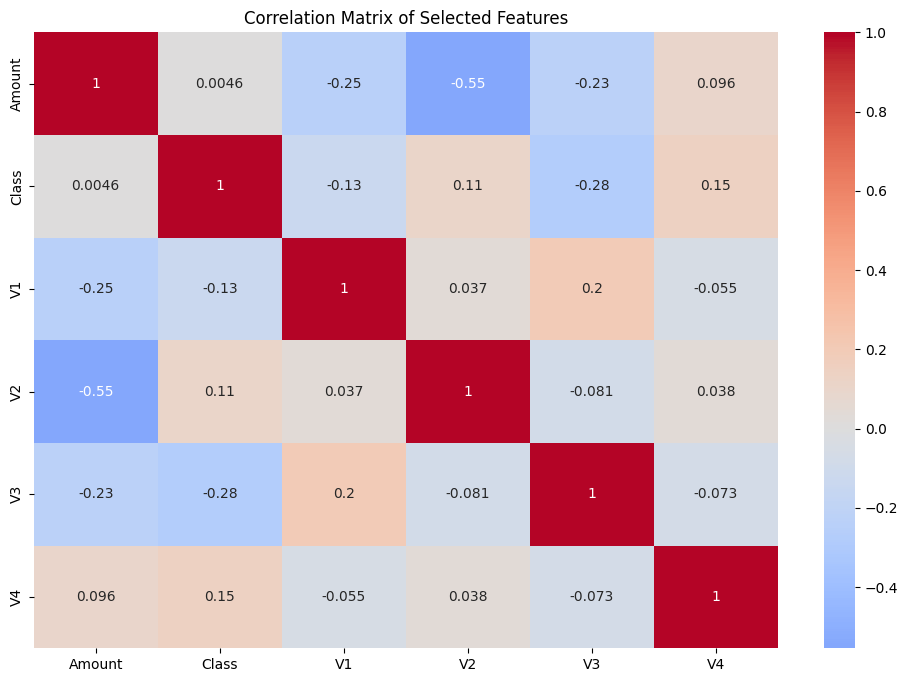

In [45]:
# Correlation matrix for important features
plt.figure(figsize=(12, 8))
# Remove 'Time' from the list of columns since it's not in the DataFrame
correlation_matrix = df[['Amount', 'Class'] + [f'V{i}' for i in range(1, 5)]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [47]:
# standardize features
from sklearn.preprocessing import StandardScaler
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

# Separate features and target
X = data_matrix[:, 1:30]
y = data_matrix[:, 29]  # Changed from 30 to 29


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print('\n')
print('X.shape=', X.shape, 'y.shape=', y.shape)

Original training set shape: {np.float64(-0.04496803776157112): np.int64(100892), np.float64(22.238017262442842): np.int64(196)}


X.shape= (126360, 29) y.shape= (126360,)


In [48]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (101088, 29) Y_train.shape= (101088,)
X_test.shape= (25272, 29) Y_test.shape= (25272,)


In [50]:
# DecisionTreeClassifier model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Convert y_train to integer labels if it contains continuous values
y_train = y_train.astype(int)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Convert y_test to integer labels for evaluation if it contains continuous values
y_test = y_test.astype(int)

# Evaluate the accuracy
accuracy = dt_model.score(X_test, y_test)
print("DecisionTreeClassifier Accuracy: {0:.5f}".format(accuracy))

DecisionTreeClassifier Accuracy: 1.00000


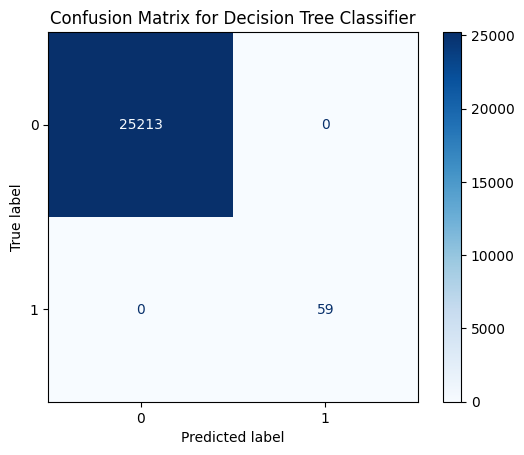

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()